# 人脸情绪识别代码

## step1 数据集下载

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("jonathanoheix/face-expression-recognition-dataset")

# print("Path to dataset files:", path)

## step2 加载数据集

Looking in indexes: http://mirrors.aliyun.com/pypi/simple


2025-03-09 03:41:54.785106: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Found 35887 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


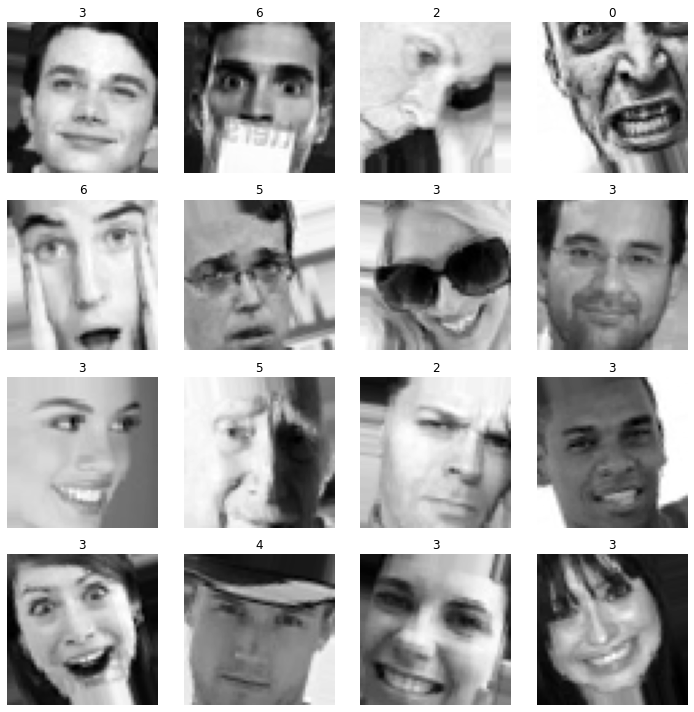

In [2]:
# display some images for every different expression
!pip install split-folders
import numpy as np
import seaborn as sns
# from keras.preprocessing.image import load_img, img_to_array
from keras.utils.image_utils import load_img, img_to_array
import matplotlib.pyplot as plt
import os
import urllib.request
import zipfile
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import splitfolders


# input path for the images
base_path = "/root/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1/images/"

TRAINING_DIR = base_path+'train'
VALIDATION_DIR = base_path+'validation'


# 做一个数据增强来强化数据集
train_datagen = ImageDataGenerator(
        rescale = 1.0/255.0,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        rotation_range = 20,
        horizontal_flip = True
    )

validation_datagen = ImageDataGenerator(
    rescale= 1.0/255
)


train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(56,56),
    color_mode="grayscale",
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(56,56),
    color_mode="grayscale",
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)
# 展示 16 张示例图片
def display_sample_images(generator, num_images=16):
    # 获取一批图像和标签
    images, labels = next(generator)

    # 创建图形和子图
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)  # 4x4 网格
        plt.imshow(images[i].reshape(56, 56), cmap='gray')  # 将图像形状调整为 (56, 56)
        plt.title(np.argmax(labels[i]))  # 显示类别标签
        plt.axis('off')  # 不显示坐标轴

    plt.tight_layout()
    plt.show()

# 调用函数展示示例图片
display_sample_images(train_generator)

## 定义CNN模型架构

In [3]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam


# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(56, 56,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

print(model.summary())

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

2025-03-09 03:41:58.449442: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-09 03:41:59.009459: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22302 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:b2:00.0, compute capability: 8.6


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       2

# Defining our 4 Convolution and 2 Dense layers model

In [4]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam


# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(56, 56,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

print(model.summary())

opt = Adam(learning_rate=0.0004)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 56, 56, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 56, 56, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)      

In [7]:
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

# 加载已经保存的模型
model = load_model("model_weights.h5.keras")

# 设置训练参数
epochs = 60

# 创建一个新的模型检查点回调
checkpoint = ModelCheckpoint("model_weights.h5.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# 继续训练模型
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    callbacks=callbacks_list
)

Epoch 1/60
559/560 [============================>.] - ETA: 0s - loss: 0.6545 - accuracy: 0.7698
Epoch 1: val_accuracy improved from -inf to 0.69190, saving model to model_weights.h5.keras
560/560 [==============================] - 31s 55ms/step - loss: 0.6546 - accuracy: 0.7698 - val_loss: 0.9782 - val_accuracy: 0.6919
Epoch 2/60
559/560 [============================>.] - ETA: 0s - loss: 0.6510 - accuracy: 0.7657
Epoch 2: val_accuracy improved from 0.69190 to 0.71278, saving model to model_weights.h5.keras
560/560 [==============================] - 30s 54ms/step - loss: 0.6508 - accuracy: 0.7658 - val_loss: 0.8883 - val_accuracy: 0.7128
Epoch 3/60
560/560 [==============================] - ETA: 0s - loss: 0.6405 - accuracy: 0.7685
Epoch 3: val_accuracy did not improve from 0.71278
560/560 [==============================] - 29s 52ms/step - loss: 0.6405 - accuracy: 0.7685 - val_loss: 0.9088 - val_accuracy: 0.6987
Epoch 4/60
560/560 [==============================] - ETA: 0s - loss: 0.637

In [9]:
# visualise training and testing accuracy and loss

def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    


    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()
 
# print best epoch with best accuracy on validation

def get_best_epcoh(history):
    valid_acc = history.history['val_accuracy']
    best_epoch = valid_acc.index(max(valid_acc)) + 1
    best_acc =  max(valid_acc)
    print('Best Validation Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

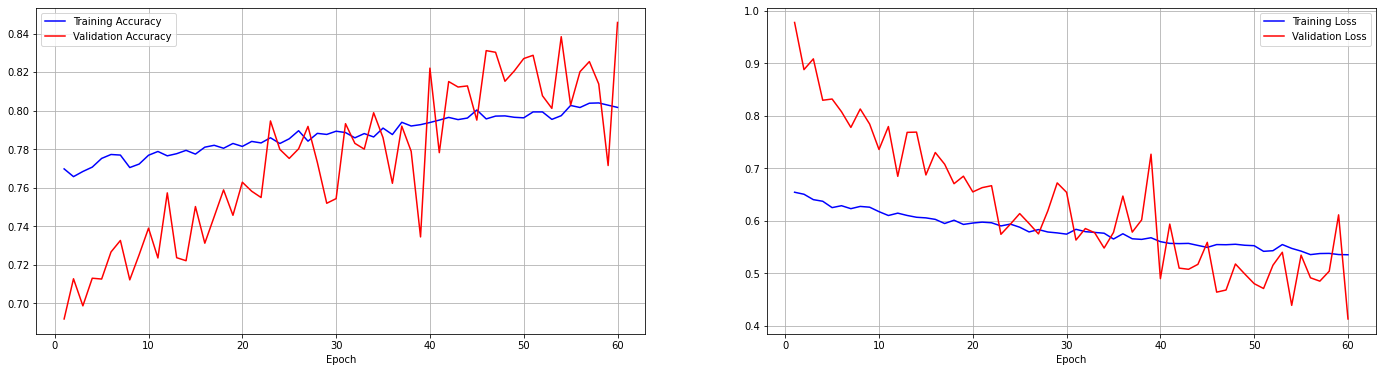

Best Validation Accuracy Score 0.84588, is for epoch 60


In [10]:
plot_results(history)
best_epoch =get_best_epcoh(history)

## 定义模型调用接口和使用方法

In [12]:
from keras.utils.image_utils import load_img, img_to_array
import numpy as np

In [13]:
def preprocess_image(image_path):
    """
    加载并预处理图像以适应模型。
    
    参数:
    - image_path: 图像文件的路径。
    
    返回:
    - 处理后的图像数组，形状为 (1, 56, 56, 1)。
    """
    img = load_img(image_path, target_size=(56, 56), color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    
    return img_array

In [14]:
def predict_image(model, image_path):
    """
    使用模型对图像进行推理。
    
    参数:
    - model: 已编译的 Keras 模型。
    - image_path: 图像文件的路径。
    
    返回:
    - 预测结果。
    """
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    
    return predictions

Class names: {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


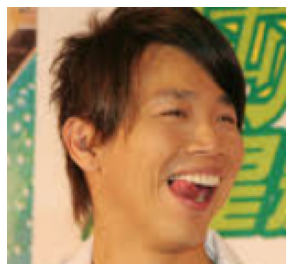

In [23]:
# 获取每个类别的名称
class_indices = train_generator.class_indices
# 反转字典以获取标签名称
class_names = {v: k for k, v in class_indices.items()}
print("Class names:", class_names)

import matplotlib.pyplot as plt
from PIL import Image

def display_image_from_path(image_path):
    """
    从文件路径加载并展示单张图片

    参数:
    image_path: 图片文件的路径
    """
    # 加载图像
    image = Image.open(image_path)
    
    # 显示图像
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray')  # 如果是灰度图像，可以使用 cmap='gray'
    plt.axis('off')  # 不显示坐标轴
    plt.show()

def load_model_from_file(weights_path):
    """
    从本地权重文件加载 Keras 模型。

    参数:
    - weights_path: 模型权重的文件路径。

    返回:
    - 加载的 Keras 模型。
    """
    model = tf.keras.models.load_model(weights_path)
    return model

display_image_from_path('./tz2.png')


In [26]:
model=load_model_from_file("./model_weights.h5.keras")
image_path = "./tz2.png"  # 要进行推理的图像路径
predictions = predict_image(model, image_path)
# print(predictions)  # 输出预测结果
label_index=np.argmax(predictions)
print("陶喆先生现在的心情是{}".format(class_names[label_index]))

1/1 [==============================] - 0s 156ms/step
陶喆先生现在的心情是happy
